In [1]:
from imports import *
from exactDiagMethods import build_exact_diag_hamiltonian, perform_exact_diag
from globalMethods import  build_initial_states, output_results
from vqteMethods import hamiltonian_generation, perform_vqte

# Don't forget to make F_L, F_R lists
# Make everything work with eps list
# Comment and delete old methods
# Make sure all imports are relevant


In [2]:
def main():
    # Initialize the simulation parameters
    N = 2
    gamma_L= 0.1
    gamma_R = 0.5
    eps = 1
    mu_L= 0.5
    mu_R= 1
    T_L = 1
    T_R= 1
    beta_L=1/T_L
    beta_R=1/T_R
    F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
    F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)
    J = 1

    eps_list = []

    for i in range(N):
        eps_list.append(1)

  
    time = 2.0
    dt = 0.01
    nt = int(time/dt)

    

 

    exact_diag_ham = build_exact_diag_hamiltonian(J, eps_list)

    print("Exact Ham", exact_diag_ham)

   #printexact_diag_hamiltonian)
    ham_real, ham_imag = hamiltonian_generation(N, eps_list, gamma_L, gamma_R, F_L, F_R,J)
    print("Ham real", ham_real)
    print("Ham imag", ham_imag)



    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)


    exact_diag_results = perform_exact_diag(gamma_L,F_L, gamma_R, F_R, dt, nt, exact_diag_init_state,exact_diag_ham, N)
    print(exact_diag_results)
 
    vqte_results = perform_vqte(ham_real, ham_imag, vqte_init_state, dt, nt, ansatz, init_param_values,N)
    
    # # Output results
    output_results(vqte_results, exact_diag_results, time, nt)

Exact Ham [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 2.+0.j 0.+0.j]
 [0.+0.j 2.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 2.+0.j]]
Ham real SparsePauliOp(['ZIII', 'IIZI', 'IZII', 'IIIZ', 'XIYI', 'YIXI', 'IYIX', 'IXIY', 'XXII', 'IIXX', 'YYII', 'IIYY'],
              coeffs=[ 0.5       +0.j, -0.5       +0.j,  0.5       +0.j, -0.5       +0.j,
 -0.00612297+0.j, -0.00612297+0.j, -0.        +0.j, -0.        +0.j,
 -1.        +0.j,  1.        +0.j, -1.        +0.j,  1.        +0.j])
Ham imag SparsePauliOp(['XIXI', 'YIYI', 'IIII', 'ZIII', 'IIZI', 'IXIX', 'IIII', 'IZII', 'IIIZ', 'IYIY'],
              coeffs=[-0.025     +0.j,  0.025     +0.j,  0.05      +0.j, -0.00612297+0.j,
 -0.00612297+0.j, -0.125     +0.j,  0.25      +0.j, -0.        +0.j,
 -0.        +0.j,  0.125     +0.j])
Exact diag initial: -1.2246467991473522e-16
Exact diag initial: -1.2246467991473522e-16
[[np.float64(-1.2246467991473522e-16), np.float64(0.000622397878671656), np.float64(0.0012456663344050066), np.float64(0.001871

C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


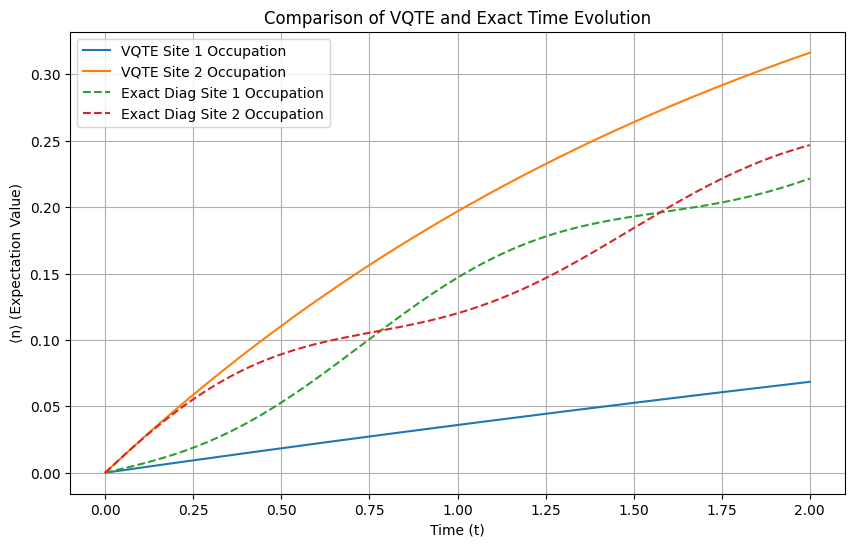

In [3]:
main()